## 16 Dates and times

이번 파트에서는 날짜와 시간을 다뤄보도록 할 것이다.  
__lubridate__ 에 집중을 해보도록 하자.  

In [2]:
library(tidyverse)

library(lubridate)
library(nycflights13)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 3.1.1       √ purrr   0.3.2  
√ tibble  2.1.1       √ dplyr   0.8.0.1
√ tidyr   0.8.3       √ stringr 1.4.0  
√ readr   1.3.1       √ forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Warning message:
"package 'nycflights13' was built under R version 3.6.3"

### 16-1 Creating date/times

날짜 시간 데이터는 세가지 유형이 있다.  

- __date__ : Tibble은 <date>로 출력한다.  
- __time__ : Tibble은 <time>로 출력한다.  
- __date-time__: Tibble은 <dttm>로 출력한다.  

현재의 시간 정보를 얻기 위해서는 다음과 같은 코드를 쓰면 된다.  

In [3]:
today()

[1] "2022-01-17"

In [4]:
now()

[1] "2022-01-17 14:31:39 KST"

이거 아니면 시간 데이터를 만드는 3가지 방법이 또 있다.  
- From a string.
From individual date-time components.
From an existing date/time object.

#### 16-1-1 From strings

lubritate의 도움을 받아 string 형식의 data를 만들 수 있다.  
그렇기 위해서는 일정한 형식을 따라야 한다.  

In [5]:
ymd("2017-01-31")

[1] "2017-01-31"

In [6]:
mdy("January 31st, 2017")

[1] "2017-03-01"

In [7]:
dmy("31-Jan-2017")

[1] "2017-01-31"

이 함수는 심지어 unquoted 숫자까지 쓸 수 있다.  

In [8]:
ymd(20170131)

[1] "2017-01-31"

언더바 이후에 시간(h),분(m),초(s)를 추가할 수 도 있다.  

In [9]:
ymd_hms("2017-01-31 20:11:59")

[1] "2017-01-31 20:11:59 UTC"

In [10]:
mdy_hm("01/31/2017 08:01")

[1] "2017-01-31 08:01:00 UTC"

timezone을 추가할 수도 있다.  

In [11]:
ymd(20170131, tz = "UTC")

[1] "2017-01-31 UTC"

### 16-1-2 From individual components
앞에서 배운 single string 대신에 여러개의 collumn에 걸친 date-time 요소들을 쓸 수도 있다.  
이는 flight data에 있다.  

In [12]:
flights %>% 
  select(year, month, day, hour, minute) %>%
    head()

year,month,day,hour,minute
2013,1,1,5,15
2013,1,1,5,29
2013,1,1,5,40
2013,1,1,5,45
2013,1,1,6,0
2013,1,1,5,58


시간 정보를 만들기 위해, `make_date()`와 `make_datetime()`를 써볼 수 있다.  

In [13]:
flights %>% 
  select(year, month, day, hour, minute) %>% 
  mutate(departure = make_datetime(year, month, day, hour, minute)) %>%
  head()

year,month,day,hour,minute,departure
2013,1,1,5,15,2013-01-01 05:15:00
2013,1,1,5,29,2013-01-01 05:29:00
2013,1,1,5,40,2013-01-01 05:40:00
2013,1,1,5,45,2013-01-01 05:45:00
2013,1,1,6,0,2013-01-01 06:00:00
2013,1,1,5,58,2013-01-01 05:58:00


In [14]:
make_datetime_100 <- function(year, month, day, time) {
  make_datetime(year, month, day, time %/% 100, time %% 100)
}# 사용자 정의 함수

flights_dt <- flights %>% 
  filter(!is.na(dep_time), !is.na(arr_time)) %>% 
  mutate(
    dep_time = make_datetime_100(year, month, day, dep_time),
    arr_time = make_datetime_100(year, month, day, arr_time),
    sched_dep_time = make_datetime_100(year, month, day, sched_dep_time),
    sched_arr_time = make_datetime_100(year, month, day, sched_arr_time)
  ) %>% 
  select(origin, dest, ends_with("delay"), ends_with("time")) 

flights_dt %>%
  head()


origin,dest,dep_delay,arr_delay,dep_time,sched_dep_time,arr_time,sched_arr_time,air_time
EWR,IAH,2,11,2013-01-01 05:17:00,2013-01-01 05:15:00,2013-01-01 08:30:00,2013-01-01 08:19:00,227
LGA,IAH,4,20,2013-01-01 05:33:00,2013-01-01 05:29:00,2013-01-01 08:50:00,2013-01-01 08:30:00,227
JFK,MIA,2,33,2013-01-01 05:42:00,2013-01-01 05:40:00,2013-01-01 09:23:00,2013-01-01 08:50:00,160
JFK,BQN,-1,-18,2013-01-01 05:44:00,2013-01-01 05:45:00,2013-01-01 10:04:00,2013-01-01 10:22:00,183
LGA,ATL,-6,-25,2013-01-01 05:54:00,2013-01-01 06:00:00,2013-01-01 08:12:00,2013-01-01 08:37:00,116
EWR,ORD,-4,12,2013-01-01 05:54:00,2013-01-01 05:58:00,2013-01-01 07:40:00,2013-01-01 07:28:00,150


위 분포를 the year동안 departure time이 몇 번 일어났는지 visualization할 수 있다.  

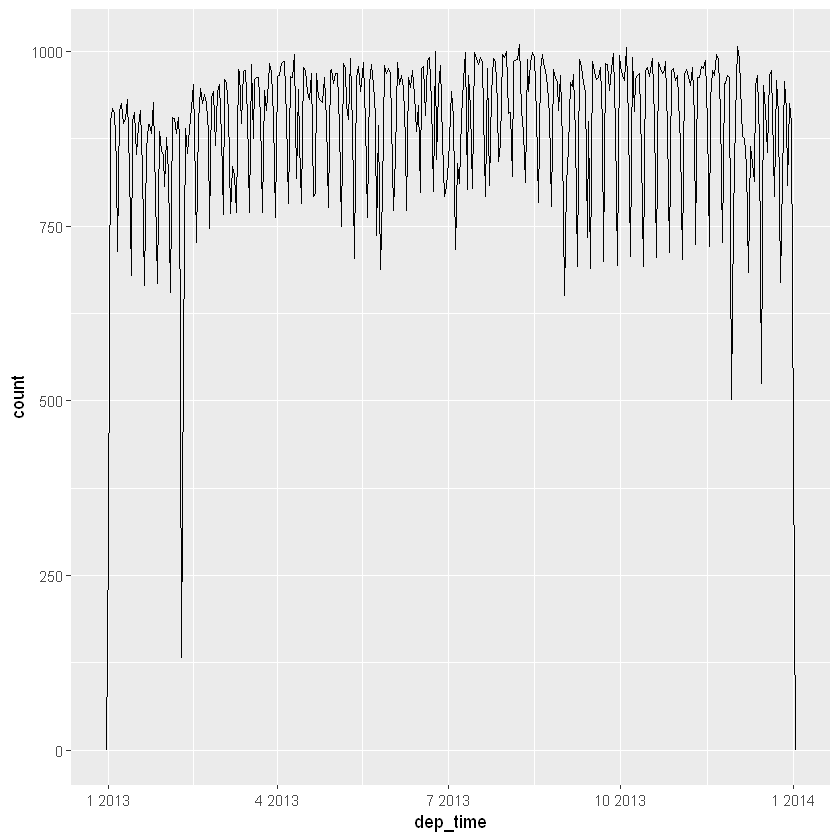

In [15]:
flights_dt %>% 
  ggplot(aes(dep_time)) + 
  geom_freqpoly(binwidth = 86400) # 86400 seconds = 1 day

아래는 하루동안 이다.  

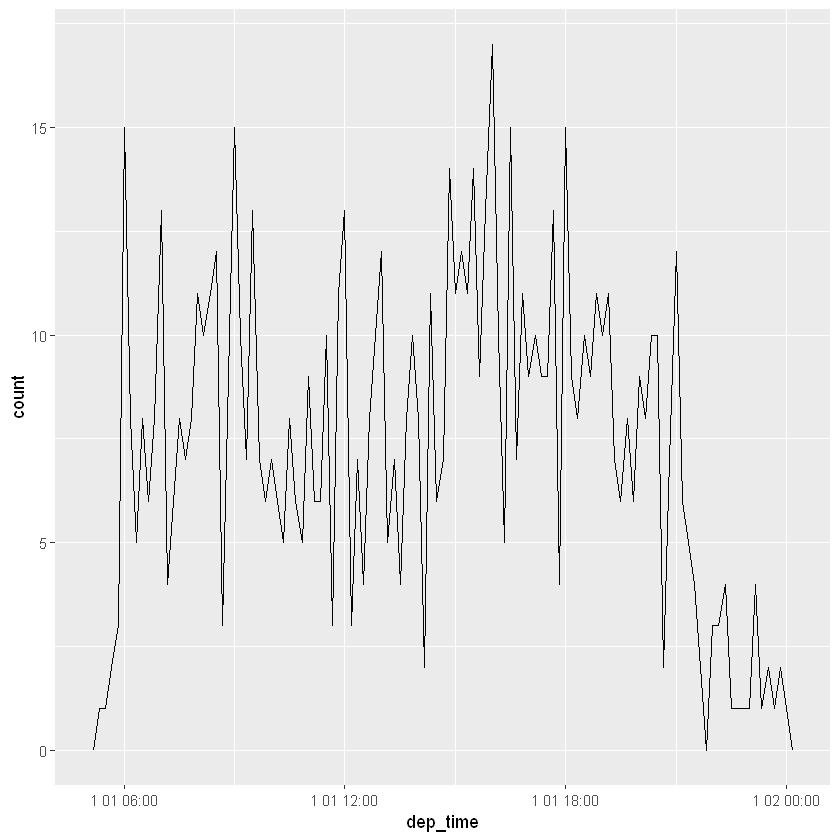

In [16]:
flights_dt %>% 
  filter(dep_time < ymd(20130102)) %>% 
  ggplot(aes(dep_time)) + 
  geom_freqpoly(binwidth = 600)

### 16-1-3 From other types

date-time과 date 사이에서 형식을 바꾸고 싶다면, `as_datetime()` 와 `as_date()` 를 사용하면 된다.  

In [17]:
as_datetime(today())

[1] "2022-01-17 UTC"

In [18]:
as_date(now())

[1] "2022-01-17"

### 16-2 Date-time components

이제 date-time data를 갖는 방법을 배웠으니, 이거 갖고 뭐를 할 수 있는 지 봐보자.  

#### 16-2-1 Getting components

다음 함수를 통해 date를 쪼갤 수 있다.  
`year()`, `month()`, `mday()` (day of the month), `yday()` (day of the year), `wday()` (day of the week), `hour()`, `minute()`, and `second()`

In [19]:
datetime <- ymd_hms("2016-07-08 12:34:56")

year(datetime)

[1] 2016

In [25]:
month(datetime)

[1] 7

In [26]:
mday(datetime)

[1] 8

In [27]:
yday(datetime)

[1] 190

In [28]:
wday(datetime)

[1] 6

`wday()`는 `label = TRUE` 를 같이 쓰면, 달의 이름으로 바뀌고, `abbr = FALSE`를 추가할시 약어에서 풀네임으로 바뀐다.  

In [37]:
wday(datetime, label = TRUE)

[1] 금
Levels: 일 < 월 < 화 < 수 < 목 < 금 < 토

In [38]:
wday(datetime, label = TRUE, abbr = FALSE)

[1] 금요일
Levels: 일요일 < 월요일 < 화요일 < 수요일 < 목요일 < 금요일 < 토요일

주말보다 평일에 flight가 많은 것을 알 수 있다.  

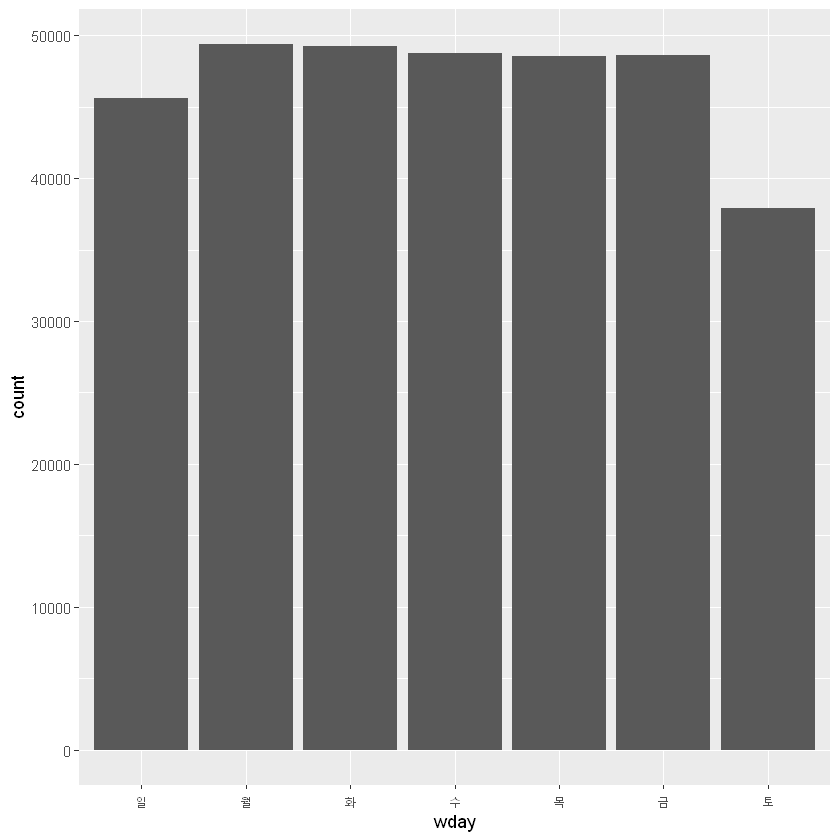

In [39]:
flights_dt %>% 
  mutate(wday = wday(dep_time, label = TRUE)) %>% 
  ggplot(aes(x = wday)) +
    geom_bar()

한편, dep_time이 20~30분, 50~60분인 시간대가 딴 시간대에 비해서 delay가 적은 것을 알 수 있다.   

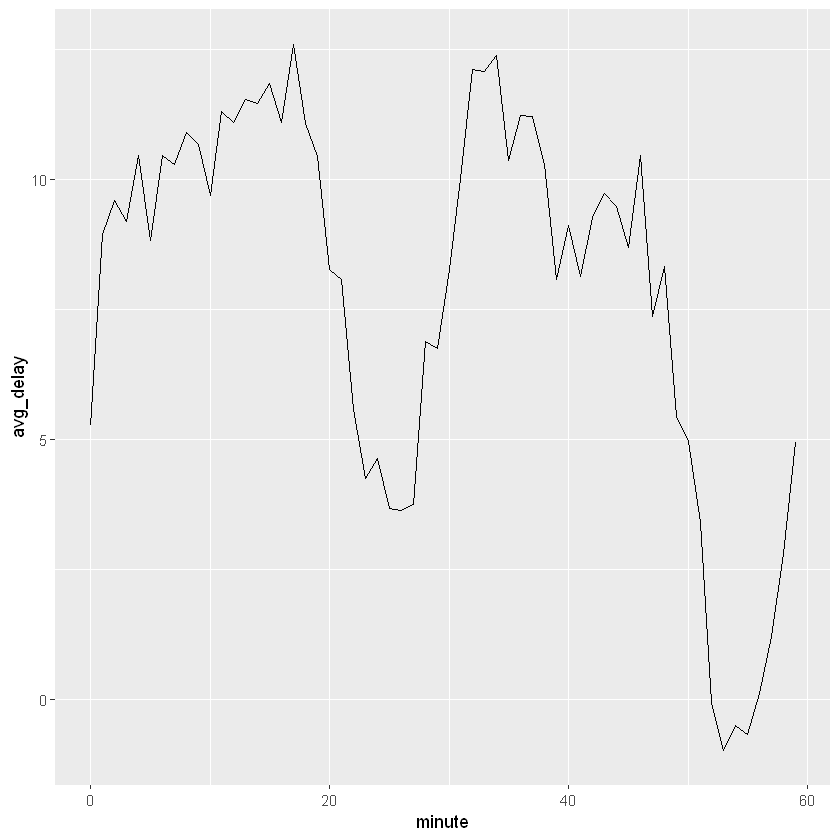

In [40]:
flights_dt %>% 
  mutate(minute = minute(dep_time)) %>% 
  group_by(minute) %>% 
  summarise(
    avg_delay = mean(arr_delay, na.rm = TRUE),
    n = n()) %>% 
  ggplot(aes(minute, avg_delay)) +
    geom_line()

### 16-2-2 Setting components

위의 함수들을 이용하여, date/time data를 정할 수 있다.  

In [43]:
(datetime <- ymd_hms("2016-07-08 12:34:56"))

[1] "2016-07-08 12:34:56 UTC"

In [44]:
year(datetime) <- 2020
datetime

[1] "2020-07-08 12:34:56 UTC"

In [45]:
month(datetime) <- 01
datetime

[1] "2020-01-08 12:34:56 UTC"

In [46]:
hour(datetime) <- hour(datetime) + 1
datetime

[1] "2020-01-08 13:34:56 UTC"

`update()`를 이용하여 이를 한 번에 할 수도 있다.  

In [47]:
update(datetime, year = 2020, month = 2, mday = 2, hour = 2)

[1] "2020-02-02 02:34:56 UTC"

만약 value가 너무 크면 이월된다. 

In [48]:
ymd("2015-02-01") %>% 
  update(mday = 30)

[1] "2015-03-02"

In [49]:
ymd("2015-02-01") %>% 
  update(hour = 400)

[1] "2015-02-17 16:00:00 UTC"

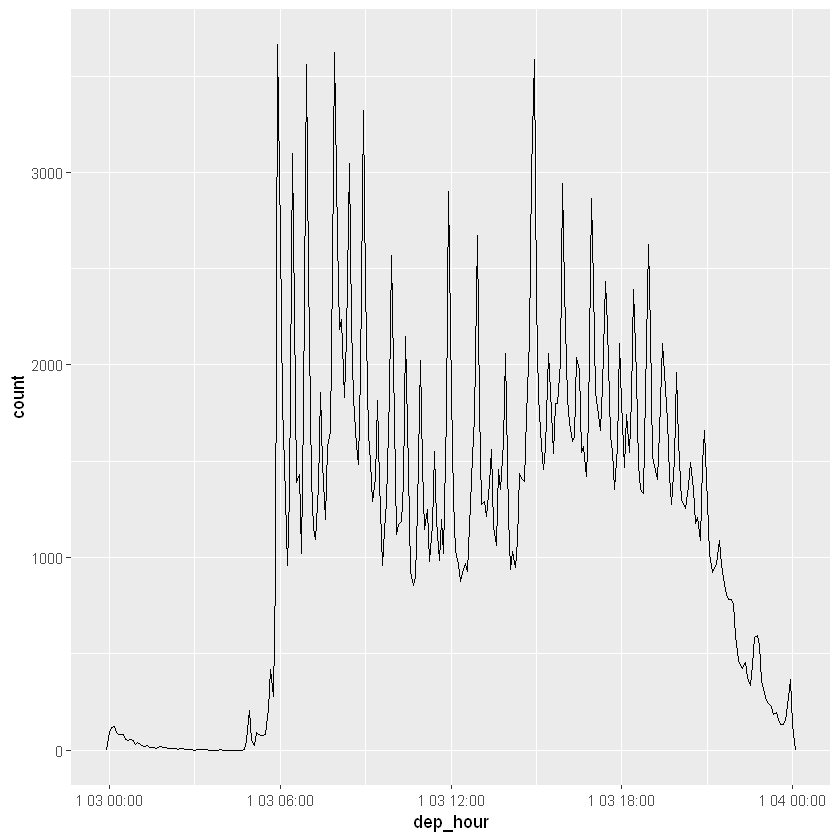

In [52]:
flights_dt %>% 
  mutate(dep_hour = update(dep_time, yday = 3)) %>% 
  ggplot(aes(dep_hour)) +
    geom_freqpoly(binwidth = 300)